<a href="https://colab.research.google.com/github/EmYassir/ml_dl_algorithms/blob/main/LC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(precision=2) 

# we set the random seed to make our results deterministic
# (same results across runs)
# on définit un noyau pour rendre nos résultats déterministes
# (pour que tout le monde ait les mêmes resultats.)
np.random.seed(2)

# On losses and gradients / Fonctions de perte et gradients

We consider labeled data $(x,y)$, where $x$ is a $d$-dimensional input, and $y\in\{-1,1\}$. We have a dataset of $n$ such pairs $(x_i,y_i)$. We want to train a linear classifier on this dataset. The classifier predicts the label
$$f( x ; w, b) = \text{sign}(w^T x + b) = 1 \quad \text{if}\quad w^T x + b\geq 0 \quad\text{and}\quad -1 \quad\text{otherwise.}$$

To simplify code and notation, we can get rid of the bias term $b$. To do  so, we concatenate $1$ to every $x$ vector, so that $x' = (x, 1) \in \mathbb{R}^{d+1}$, and we concatenate $b$ to $w$, so that $w' = (w, b)$. Then $w^T x + b = w'^T x'$. We can write everything in terms of linear transformations instead of affine transformations. We will omit the bias term from now on.

The training error is defined as the average number of mistakes
$$\text{Error}(w) = \frac{1}{n}\sum_{i=1}^n \mathbb{1}\{y_i \neq f(x_i ; w) \}$$
where $\mathbb{1}\{A\}$ is the indicator function. It is worth $1$ when $A$ is true, and $0$ otherwise.

**Exercise:** Minimizing directly this number of error is extremely hard. *Why ?*

Instead we are going to try minimizing 4 different losses. These losses are called *convex surrogate* losses. They are convex and have a (sub-)gradient so we can optimize them with gradient descent.
* linear regression $g(w; x, y) = \frac{1}{2}(x^T w - y)^2$.
* perceptron $g(w; x, y) = \max(0, -y x^T w)$.
* SVM $g(w; x, y) = \max(0, 1 - y x^T w)$.
* logistic regression $g(w; x, y) = \log( 1 + e^{- y x^T w})$.

The training objective that we are going to minimize is the average of the losses over each training example plus an $\ell^2$ regularization with hyperparameter $\lambda$:
$$L(w) = \frac{1}{n}\sum_{i=1}^n g(w; x_i, y_i) + \frac{\lambda}{2} \| w\|^2 $$

Note that for the SVM, the regularization term is necessary to find the largest margin.

**Exercise:** Plot all these losses as a function of $z = x^T w$ assuming $y = 1$. Also plot the error counter $\mathbb{1}\{y \neq f(x ; w) \} = \mathbb{1}\{ x^T w <0 \} = \mathbb{1}\{ z <0 \} $

<hr>

Nous considérons ici des données labellisées $(x,y)$, $x$ est une entrée de dimension $d$ et $y\in\{-1,1\}$. Notre dataset contient n de ces paires. L'objectif de cette séance sera d'entraîner des classifieurs linéaires sur ce dataset. Ces classifieurs linéaires font la prédiction:
$$f( x ; w, b) = \text{sign}(w^T x + b) = 1 \quad \text{si}\quad w^T x + b\geq 0 \quad\text{et}\quad -1 \quad\text{sinon.}$$

Afin de simplifier le code et la notation, nous pouvons nous débarasser du terme du biais $b$. Pour se faire, on concatène une $1$ à chaque vecteur $x$ de telle façon que $x' = (x, 1) \in \mathbb{R}^{d+1}$ et l'on concatène $b$ et $w$ pour que $w' = (w, b)$. Ainsi, $w^T x + b = w'^T x'$ et nous pouvons tout écrire en terme de transformations linéaires à la place de transformations affines. Nous pouvons maintenant omettre le terme de biais.

L'erreur d'entraînement est définie comme étant la moyenne des erreurs obtenues dans le dataset: 

$$\text{Error}(w) = \frac{1}{n}\sum_{i=1}^n \mathbb{1}\{y_i \neq f(x_i ; w) \}$$

où $\mathbb{1}\{A\}$ est la fonction indicatrice. 

**Exercice:** Nous ne pouvons pas directement minimiser cette fonction. *Pourquoi ?*

Puisque nous ne pouvons pas minimiser cette expression, nous allons plutôt minimiser 4 différentes fonctions de perte qui sont typiquement utilisées avec des modèles linéaires. Ces fonctions sont appelées des fonctions convexes de substitution. Elles sont convexes et possède un (sous-)gradient donc nous pouvons les optimiser avec la descente du gradient.

* régression linéaire $g(w; x, y) = \frac{1}{2}(x^T w - y)^2$.
* perceptron $g(w; x, y) = \max(0, -y x^T w)$.
* SVM $g(w; x, y) = \max(0, 1 - y x^T w)$.
* régression logistique $g(w; x, y) = \log( 1 + e^{- y x^T w})$.

La fonction objectif que nous allons minimiser est la moyenne des pertes de chaque exemple additionné à une régularisation de type $\ell^2$ d'hyperparamètre $\lambda$:

$$L(w) = \frac{1}{n}\sum_{i=1}^n g(w; x_i, y_i) + \frac{\lambda}{2} \| w\|^2 $$

Notez que pour le SVM, le terme de régularisation sert en fait à trouver la marge maximale de la frontière de décision.

**Exercice:** Complétez les fonctions suivantes qui effectuent le graphique de ces pertes en fonction de $z = x^T w$ en assumant que $y = 1$. Complétez également la fonction `error_counter` qui représente $\mathbb{1}\{y \neq f(x ; w) \} = \mathbb{1}\{ x^T w <0 \} = \mathbb{1}\{ z <0 \} $.


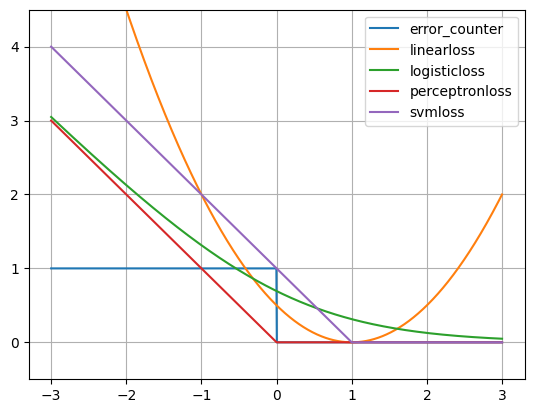

In [2]:
# Question 1

def error_counter(z):
  # write code here/écrivez votre code ici
  return (z < 0).astype(int)
  # return np.array([1 if zi < 0 else 0 for zi in z])

def linearloss(z):
  # write code here/écrivez votre code ici
  return .5 * (z - 1) ** 2

def logisticloss(z):
  # write code here/écrivez votre code ici
  return np.log(1 + np.exp(-z))

def perceptronloss(z):
  # write code here/écrivez votre code ici
  return np.maximum(0, -z)

def svmloss(z):
  # write code here/écrivez votre code ici
  return np.maximum(0, 1-z)

zz = np.linspace(-3,3,1000)
plt.figure()
for loss in [error_counter, linearloss, logisticloss,perceptronloss, svmloss]:
    plt.plot(zz, loss(zz), label=loss.__name__)

plt.ylim(-.5,4.5)
plt.legend()
plt.grid()
plt.show()

**Exercise:** Compute the gradient of each of the losses above with respect to $w$.

**Bonus Exercise:** All of these losses have a gradient that is expressed as a scalar times $x$. Again, plot these scalar parts, assuming that $y=1$.

<hr>

**Exercice:** Dérivez le gradient par rapport à $w$ pour chacune des fonctions de pertes définies ci-dessus.

**Exercice bonus:** Toutes ces fonctions de pertes ont un gradient qui est définit comme étant un scalaire multiplié pas $x$. Encore une fois, faites un graphique de ces scalaires en assumant que $y=1$.

## 1. Data Preprocessing/ Prétraitement de données

For our binary classification problem, we will only use two classes: iris class 1 and 2. We will preprocess the dataset to extract only examples of these two classes, and for simplicity we will change their labels to be 1 and -1. In order to easliy visualize the decision boundaries, we will also use only 2 input features.

Here is the code for the preprocessing:

<hr>

Pour notre problème de classification binaire, nous allons utiliser uniquement deux classes du dataset iris, soit la classe 1 et la classe 2. Ainsi, seulement les exemples appartenant à la classe 1 ou 2 seront considérés et par mesure de simplicité, nous allons changer leurs étiquettes à 1 et -1. Nous allons de plus utiliser seulement que deux caractéristiques (`feature`) des fleurs du dataset iris pour chaque exemple. Ceci permet de facilement visualiser les frontières de décisions.

Voici le code pour le pré-traitement:

In [3]:
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    iris = np.loadtxt('http://www.iro.umontreal.ca/~dift3395/files/iris.txt')
else:
    iris = np.loadtxt('iris.txt')

def preprocess(data, label_subset, feature_subset, n_train):
    
    """Randomly split data into a train and test set 
    with the subset of classes in label_subset and the subset
    of features in feature_subset.
    ------
    Effectue une partition aléatoire des données en sous-ensembles 
    train set et test set avec le sous-ensemble de classes label_subset 
    et le sous-ensemble de feature feature_subset
    """
    # extract only data with class label in label_subset
    # on extrait seulement les classes de label_subset
    data = data[np.isin(data[:,-1],label_subset),:]
    
    # remap labels to [-1, 1]
    # on transforme les classes pour qu'elles soient [-1, 1]
    if len(label_subset)!=2:
        raise UserWarning('We are exclusively  dealing with binary classification.')
    data[data[:,-1]==label_subset[0],-1] = -1
    data[data[:,-1]==label_subset[1],-1] = 1

    # extract chosen features + labels
    # on extrait les features et leurs étiquettes
    data = data[:, feature_subset + [-1]]
    
    # insert a column of 1s for the bias
    # on ajoute une colonne pour le biais
    data = np.insert(data, -1, 1, axis=1)

    # separate into train and test
    # on sépare en train et test
    inds = np.arange(data.shape[0])
    np.random.shuffle(inds)
    train_inds = inds[:n_train]
    test_inds = inds[n_train:]
    trainset = data[train_inds] 
    testset = data[test_inds]

    # normalize train set to mean 0 and standard deviation 1 feature-wise
    # apply the same transformation to the test set
    # on normalise les données pour qu'elles soient de moyenne 0
    # et d'écart-type 1 par caractéristique et on applique 
    # ces mêmes transformations au test set
    mu = trainset[:,:2].mean(axis=0)
    sigma  = trainset[:,:2].std(axis=0)
    trainset[:,:2] = (trainset[:,:2] -mu)/sigma
    testset[:,:2] = (testset[:,:2] -mu)/sigma

    return trainset, testset


trainset, testset = preprocess(iris, label_subset=[1,2], feature_subset=[2,3], n_train=75)

## 2. Some helper functions/Quelques fonctions utilitaires

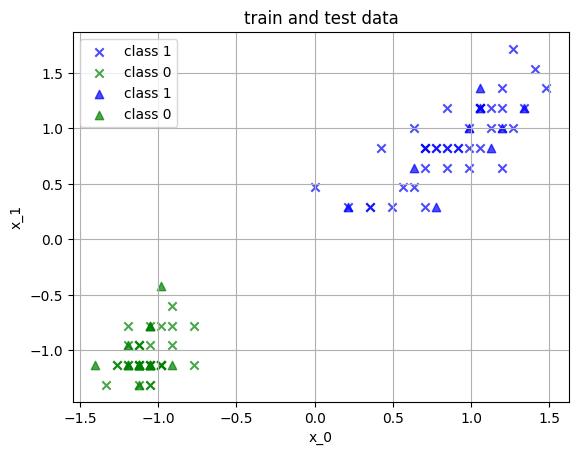

In [8]:
def scatter(theset, marker='o'):
    d1 = theset[theset[:, -1] > 0]
    d2 = theset[theset[:, -1] < 0]
    plt.scatter(d1[:, 0], d1[:, 1], c='b', marker=marker, label='class 1', alpha=.7)
    plt.scatter(d2[:, 0], d2[:, 1], c='g', marker=marker, label='class 0', alpha=.7)
    plt.xlabel('x_0')
    plt.ylabel('x_1')


def finalize_plot(title):
    plt.title(title)
    plt.grid()
    plt.legend()

scatter(trainset, marker='x')
scatter(testset, marker='^')
finalize_plot('train and test data')

Below we graph and define the decision boundary of the models we will train. Since the decision rule is the same for all models, finding the decision boundary is also the same procedure, more specifically, we isolate $x_1$ in $f(x) = x^{T}w = 0$.

<hr>

Nous représentons et définissons ci-dessous la frontière de décision des modèles linéaires que nous allons entraîner. Comme la règle de décision pour faire la prédiction d'un exemple est commune à tous ces modèles, la frontière de décision est alors calculée de la même façon, c'est-à-dire en isolant $x_1$ dans $f(x) = x^{T}w = 0$.

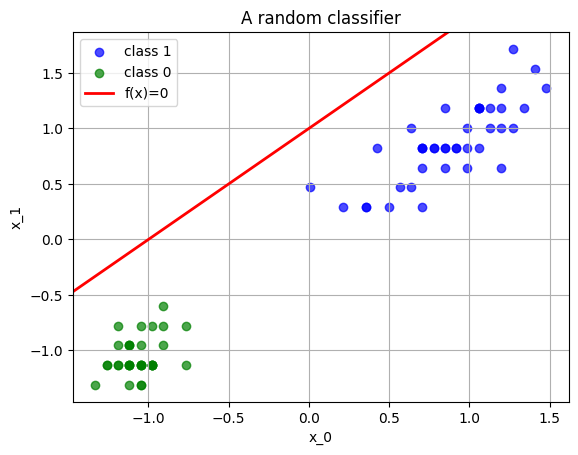

In [5]:
def decision_boundary(w):
    if w[1]==0:
        raise RuntimeWarning("This decision boundary is either vertical, either undefined.")

    # hack to avoid changing the boundaries
    # truc pour éviter de changer les limites
    xlim = plt.xlim()
    ylim = plt.ylim()

    xx = np.linspace(-10, 10, 2)
    yy = -(w[2] + w[0]*xx)/w[1]
    plt.plot(xx, yy, c='r', lw=2, label='f(x)=0')

    # hack to avoid changing the boundaries
    # truc pour éviter de changer les limites
    plt.xlim(xlim)
    plt.ylim(ylim)



w0 = np.array([1,-1,1])
scatter(trainset)
decision_boundary(w0)
finalize_plot('A random classifier')

## 3. Base Class/Classe Parent

We define here a *base* class (or *parent* class) that we will pass in our *derived* classes (or *child* classes) below. Hence, when calling the function `super().__init__` in our derived classes, we inherit attributes without needing to implement them again. We have one derived class for each linear classifier and in these classes, your role will be to complete the `loss` and `gradient` methods.

#### Gradient Descent
We want to minimize the loss $L$. It is differentiable, so we can use the gradient descent algorithm: start from any initialization parameter $w_0$, and repeat for $t\in\{0, \dots, t_\max \}$:
$$w_{t+1} = w_t - \eta \nabla L (w_t) \; .$$
Under some conditions on the step-size $\eta$ and the loss $L$, this algorithm is guaranteed to converge to a minimum of $L$. We ask you to complete this algorithm in the base class.

#### Prediction function
You will need to fill in the `predict` function of this class. This function should return the predictions given a batch of data `X` (matrix of size $n_{examples} \times n_{features}$)

#### Test function
You will need to fill in the `test` function. This function takes a batch of data `X` (matrix of size $n_{examples} \times n_{features}$) alongside their labels `y` (array of size $n_{examples}$) and returns the error rate for this batch.

#### Train function
You will need to fill in the for loop in the `train` function. Each step of this loop should update the parameter $w$ by performing a gradient descent udpate, and update the lists `losses` and `errors`.

<hr>

Nous définissons ici une classe parent qui sera passée par la suite dans les classes enfants qui sont présentées ci-dessous. En appellant la fonction `super().__init__` à l'intérieur des classes enfants, nous pouvons ainsi hériter d'attributs de la classe parent sans devoir les implémenter à nouveau. Nous avons une classe enfant pour chacun des classifieurs linéaires et dans ces classes, votre rôle sera de complétez les méthodes `loss` et `gradient`.

#### La Descente de Gradient
Nous voulons minimiser la fonction de perte $L$. Cette fonction est différentiable, donc nous pouvons utiliser l'algorithme de descente de gradient: commencer par n'importe quelle initialisation du paramètre $w_0$ et répéter pour $t\in\{0, \dots, t_\max \}$:
$$w_{t+1} = w_t - \eta \nabla L (w_t) \; .$$
Sous certaines conditions sur la taille du pas $\eta$ et de la perte $L$, cet algorithme est garanti de converger à un minimum de $L$. Vous devez compléter cet algorithme dans cette classe parent.

#### Fonction de prédiction
Vous devrez remplir la fonction `predict` de cette classe. Cette fonction doit retourner les prédictions étant donnée une matrice de données `X` (de taille $n_{exemples} \times n_{features}$).


#### Fonction de test
Vous devrez remplir la fonction `test` de cette classe. Cette fonction prend en entrée une matrice de données `X` (de taille $n_{exemples} \times n_{features}$) et les étiquettes correspondantes (`y`, vecteur de taille $n_{examples}$), et retourne l'erreur moyenne du classifieur sur ces données-là.

#### Fonction d'entraînement
Vous devrez écrire le code de la boucle for de la fonction `train`. Chaque étape de cette boucle doit effectuer une mise-à-jour du paramètre $w$ avec la méthode du gradient, et mettre-à-jour les listes `losses` et `errors`.

Training completed: the train error is 45.33%
The test error is 64.00%
Final weights:  [-2.04e-10  2.04e-10  2.04e-10]


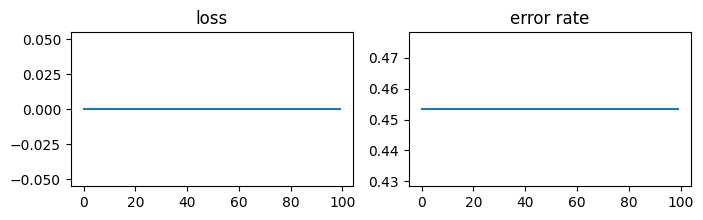

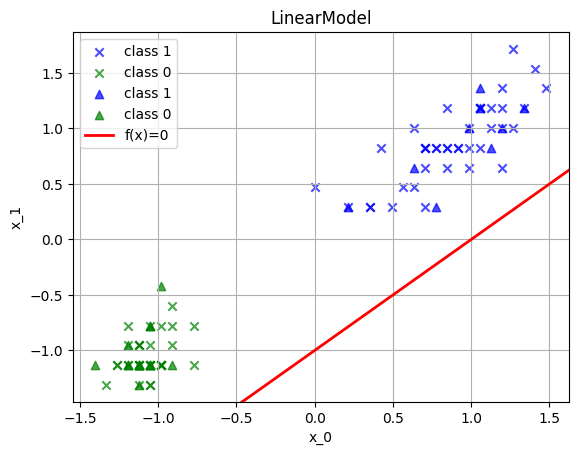

In [10]:
class LinearModel:
    """"Abstract class for all linear models.
    -------
    Classe parent pour tous les modèles linéaires.
    """

    def __init__(self, w0, reg):
        """The linear weights and bias is encoded in w.
        The regularization hyperparameter is reg.
        Les poids et les biais sont définis dans w. 
        L'hyperparamètre de régularisation est reg.
        """
        self.w = np.array(w0, dtype=float)
        self.reg = reg


    def predict(self, X):
        """Return f(x) for a batch X
        Retourne f(x) pour un batch X
        """
        # write code here/écrivez votre code ici
        return np.dot(X, self.w)

    def test(self, X, y): 
        """Return the error rate for a batch X
        Retourne le taux d'erreur pour un batch X
        """
        # write code here/écrivez votre code ici
        return np.mean(self.predict(X) * y < 0)

    # methods loss and gradient will be redefined in child classes
    # les méthodes loss et gradient seront redéfinies dans les classes enfants
    def loss(self, X, y): 
        return 0

    def gradient(self, X, y): 
        return self.w

    def train(self, data, stepsize, n_steps):
        """Train with full batch gradient descent with a fixed step size 
        for n_steps iterations. Return the training losses and error rates
        seen along the trajectory.
        --------
        Faire la descente du gradient avec batch complet pour n_steps itération 
        et un taux d'apprentissage fixe. Retourne les tableaux de loss et de
        taux d'erreur vu apres chaque iteration.
        """

        X = data[:,:-1]
        y = data[:,-1]
        losses = []
        errors = []

        for _ in range(n_steps):
            # write code here/écrivez votre code ici
            self.w -= stepsize * self.gradient(X, y)
            losses += [self.loss(X, y)]
            errors += [self.test(X, y)]
            #errors.append(1.) # remove this line once you've written your code

        print("Training completed: the train error is {:.2f}%".format(errors[-1]*100))
        return np.array(losses), np.array(errors)

def test_model(modelclass, w0=[-1, 1, 1], reg=.1, stepsize=.2):
    """Create instance of modelclass, train it, compute test error,
    plot learning curves and decision boundary.
    --------
    Crée une instance de modelclass, entraîne la, calcule le taux d'erreurs sur un
    test set, trace les courbes d'apprentissage et la frontieres de decision.
    """
    model = modelclass(w0, reg)
    training_loss, training_error = model.train(trainset, stepsize, 100)
    print("The test error is {:.2f}%".format(
      model.test(testset[:,:-1], testset[:,-1])*100))
    print('Final weights: ', model.w)

    # learning curves
    fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8,2))
    ax0.plot(training_loss)
    ax0.set_title('loss')
    ax1.plot(training_error)
    ax1.set_title('error rate')

    # data plot
    plt.figure()
    scatter(trainset, marker='x')
    scatter(testset, marker='^')
    decision_boundary(model.w)
    finalize_plot(modelclass.__name__)

test_model(LinearModel)

## 4. Linear Regression/Régression linéaire

**Exercise:** Complete the `loss` and `gradient` methods.

<hr>

**Exercice:** Complétez les méthodes `loss` et `gradient`.

Training completed: the train error is 0.00%
The test error is 0.00%
Final weights:  [0.4  0.52 0.08]


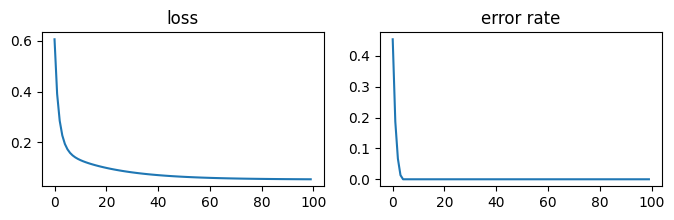

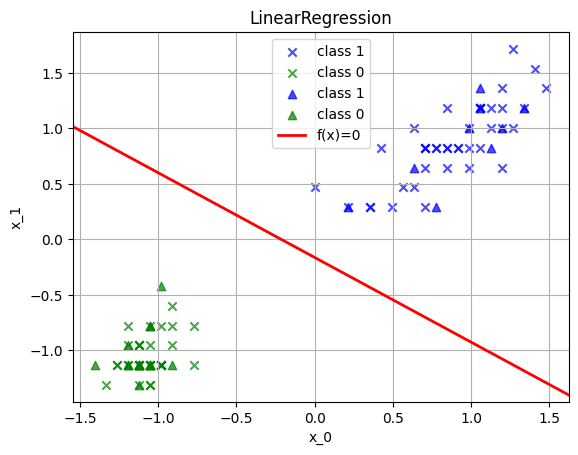

In [11]:
# Question 2

class LinearRegression(LinearModel):

    def __init__(self, w0, reg):
        super().__init__(w0, reg)

    def loss(self, X, y):
        """Compute the mean loss for batch X.
        Take as input a matrix X and a vector y and return a scalar.
        --------
        Calcule la perte moyenne pour une batch X. 
        Prend en entrée une matrice X et le vecteur y et retourne un scalaire.
        """
        # write code here/écrivez votre code ici
        return .5 * np.mean((self.predict(X) - y) ** 2) + .5 * self.reg * np.sum(self.w ** 2)

    def gradient(self, X, y):
        """Compute loss gradient with respect to w for a batch X.
        Take as input a matrix X and a vector y
        Return a vector with the same shape as w.
        -------
        Calcule le gradient de la fonction de perte par rapport a w pour un batch X.
        Prend en entrée une matrice X et le vecteur y.
        Retourne un vecteur de la meme taille que w.
        """
        # write code here/écrivez votre code ici
        return ((self.predict(X) - y)[:, np.newaxis] * X).mean(axis=0) + self.reg * self.w

test_model(LinearRegression)

## 5. Perceptron

**Exercise:** Complete the `loss` and `gradient` methods.

<hr>

**Exercice:** Complétez les méthodes `loss` et `gradient`.

Training completed: the train error is 0.00%
The test error is 4.00%
Final weights:  [-0.45  1.52  0.48]


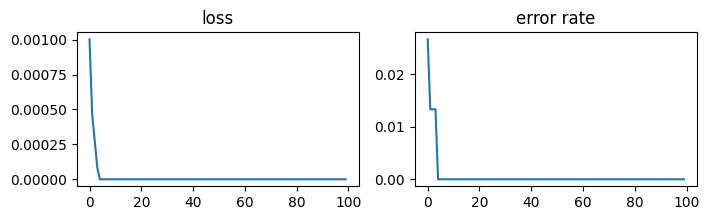

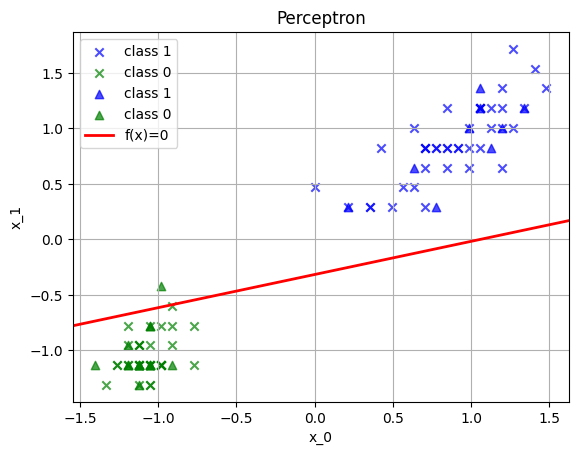

In [12]:
# Question 3

class Perceptron(LinearModel):

    def __init__(self, w0, reg):
        super().__init__(w0, reg)

    def loss(self, X, y):
        # write code here/écrivez votre code ici
        return .5 * np.mean(np.maximum(0, -y * self.predict(X))) + .5 * self.reg * np.sum(
            self.w ** 2)

    def gradient(self, X, y):
        # write code here/écrivez votre code ici
        active = (y * self.predict(X) < 0).astype(float)
        return - ((y * active)[:, np.newaxis] * X).mean(axis=0) + self.reg * self.w


test_model(Perceptron, reg=0, stepsize=1)

## 6. SVM

**Exercise:** Complete the `loss` and `gradient` methods.

<hr>

**Exercice:** Complétez les méthodes `loss` et `gradient`.

Training completed: the train error is 0.00%
The test error is 0.00%
Final weights:  [0.76 0.65 0.27]


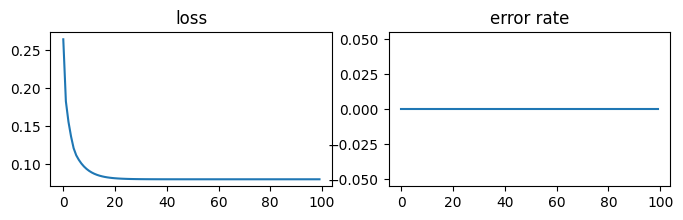

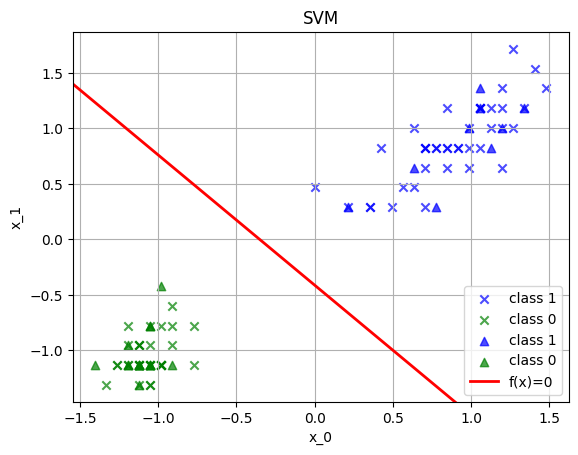

In [13]:
# Question 4

class SVM(LinearModel):

    def __init__(self, w0, reg):
        super().__init__(w0, reg)

    def loss(self, X, y):
        # write code here/écrivez votre code ici
         return np.mean(np.maximum(0, 1 - y * self.predict(X))) + .5 * self.reg * np.sum(
            self.w ** 2)

    def gradient(self, X, y):
        # write code here/écrivez votre code ici
        active = (y * self.predict(X) < 1).astype(float)
        return - ((y * active)[:, np.newaxis] * X).mean(axis=0) + self.reg * self.w


test_model(SVM, reg=.1, stepsize=1)

## 7. Logistic Regression/Régression logistique

**Exercise:** Complete the `loss` and `gradient` methods.

<hr>

**Exercice:** Complétez les méthodes `loss` et `gradient`.

Training completed: the train error is 0.00%
The test error is 0.00%
Final weights:  [0.94 1.17 0.2 ]


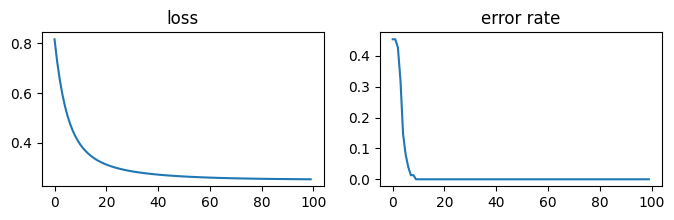

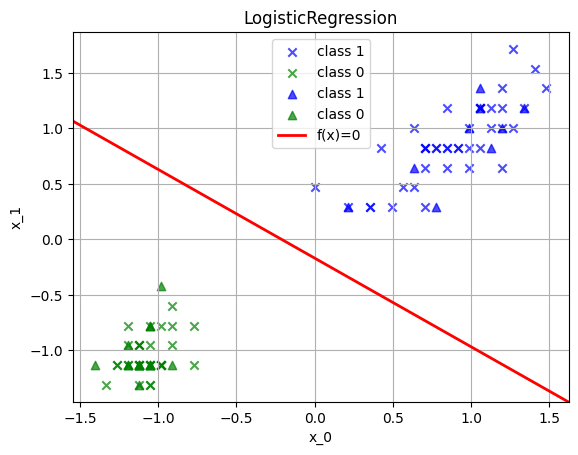

In [14]:
# Question 5

class LogisticRegression(LinearModel):

    def __init__(self, w0, reg):
        super().__init__(w0, reg)

    def loss(self, X, y):
        # write code here/écrivez votre code ici
        return np.mean(np.log(1 + np.exp(-y * self.predict(X)))) + .5 * self.reg * np.sum(
            self.w ** 2)

    def gradient(self, X, y):
        # write code here/écrivez votre code ici
        probas = 1 / (1 + np.exp(y * self.predict(X)))
        return - ((y * probas)[:, np.newaxis] * X).mean(axis=0) + self.reg * self.w
  

test_model(LogisticRegression)

## Conclusion

All Finished! You've now trained 4 models with the most common losses in machine learning. To be exact, the perceptron loss is not used anymore. Do you know why ? Can you spot a difference in behavior compared to the SVM loss when you play with hyperparameters or set a random initialization? What can you tell about the behavior of the decision boundary with different experiments?

Nowadays, machine learning datasets are so large that we use stochastic gradient descent instead of full batch gradient descent. You can try and implement this in the base class `LinearModel`. 

You may also explore different hyperparameters and observe your graph functions!

<hr>

C'est terminé! Vous avez maintenant réussi à entraîner 4 modèles à l'aide de fonctions de pertes les plus connues. Pour être exacte, la fonction de perte du perceptron n'est plus vraiment utilisée. Savez-vous pourquoi? Êtes-vous en mesure de comparer le comportement de la perte du SVM versus celle du perceptron lorsque vous jouez avec différents hyperparamètres et initialisations? Que pouvez-vous dire du comportement de la frontière de décision du perceptron?

Actuellement, les jeux de données en apprentissage machine sont tellement énormes que nous utilisons la descente du gradient stochastique plutôt que la descente du gradient complète. Vous pouvez d'ailleurs essayer de l'implémenter dans la classe parent `LinearModel`.

Vous pouvez également explorer différents hyperparamètres et observer vos résultats!
